In [23]:
%matplotlib inline
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import pandas as pd
from pandas import DataFrame

In [24]:
def prepare_data(data):

    data['elapsed_time'] = (data['timestamp'] - min(data['timestamp']))/1000
    data = data.sort_values(by=['timestamp'])
    data['version'] =np.where(data['version'], '1', '2')
    data=data.reset_index(drop=True)
    k = [1] * len(data.index)
    for i in range(1,len(data.index)):
         if data['statusCode'][i] == 201 :
            k[i] = k[i-1] +1
         else:
            k[i] = k[i-1]

    data['instance'] = k

    return data


In [25]:
def plot_data(data,label,plot):

    plot.set_title(label)
    plot.plot(data.loc[data['statusCode'] == 200]['elapsed_time'], data.loc[data['statusCode'] == 200]['latency'], color='green',marker='x', markersize=4, label='Existing Instance', linewidth=0)
    plot.plot(data.loc[data['statusCode'] == 201]['elapsed_time'], data.loc[data['statusCode'] == 201]['latency'], color='blue',marker='o', markersize=6, label='New Instance', linewidth=0)
    plot.plot(data.loc[data['statusCode'] == 400]['elapsed_time'], data.loc[data['statusCode'] == 400]['latency'], color='red',marker='*', markersize=6, label='Failed Request', linewidth=0)
    plot.yaxis.set_ticks_position('both')
    plotInstance = plot.twinx()
    plotInstance.plot(data['elapsed_time'], data['instance'], color='black', label='Instances', linewidth=1)
    if label=='Microsoft Azure Windows Function App Code Change' :
        plotInstance.legend(loc='center right')
        plot.legend(loc='upper left')

    print(label + ' average latency is ' + str(round(sum(data['latency'])/len(data['latency']),2)))


In [26]:
def plot_staleness(data,label,plot):

    plot.set_title(label)
    plot.xaxis.grid(True)

    t_visibility=round(max(data.loc[data['version'] == '1']['elapsed_time']) - min(data.loc[data['version'] == '2']['elapsed_time']),1)
    plot.plot(data['elapsed_time'][int(0*len(data['elapsed_time'])/5): int(5*len(data['elapsed_time'])/5)], data['version'][int(0*len(data['elapsed_time'])/5): int(5*len(data['elapsed_time'])/5)], color='black',label='t-Visibilty=' + str(t_visibility)+'s', markersize=4, marker='x', linewidth=0)
    plot.legend(markerscale =0,loc='center right', fontsize=14)
    print (label +' time to propagate is '+ str (round(min(data.loc[data['version'] == '2']['elapsed_time']) -30,3)))
    

    return True

AWS Lambda Code Change average latency is 432.93
AWS Lambda Configuration Change average latency is 840.24
Gcloud Function Code Change average latency is 342.9
Gcloud Function Configuration Change average latency is 504.59
IBM Cloud Functions Code Change average latency is 251.29
IBM Cloud Functions Configuration Change average latency is 348.36
Microsoft Azure Linux Function App Code Change average latency is 546.15
Microsoft Azure Windows Function App Code Change average latency is 878.94


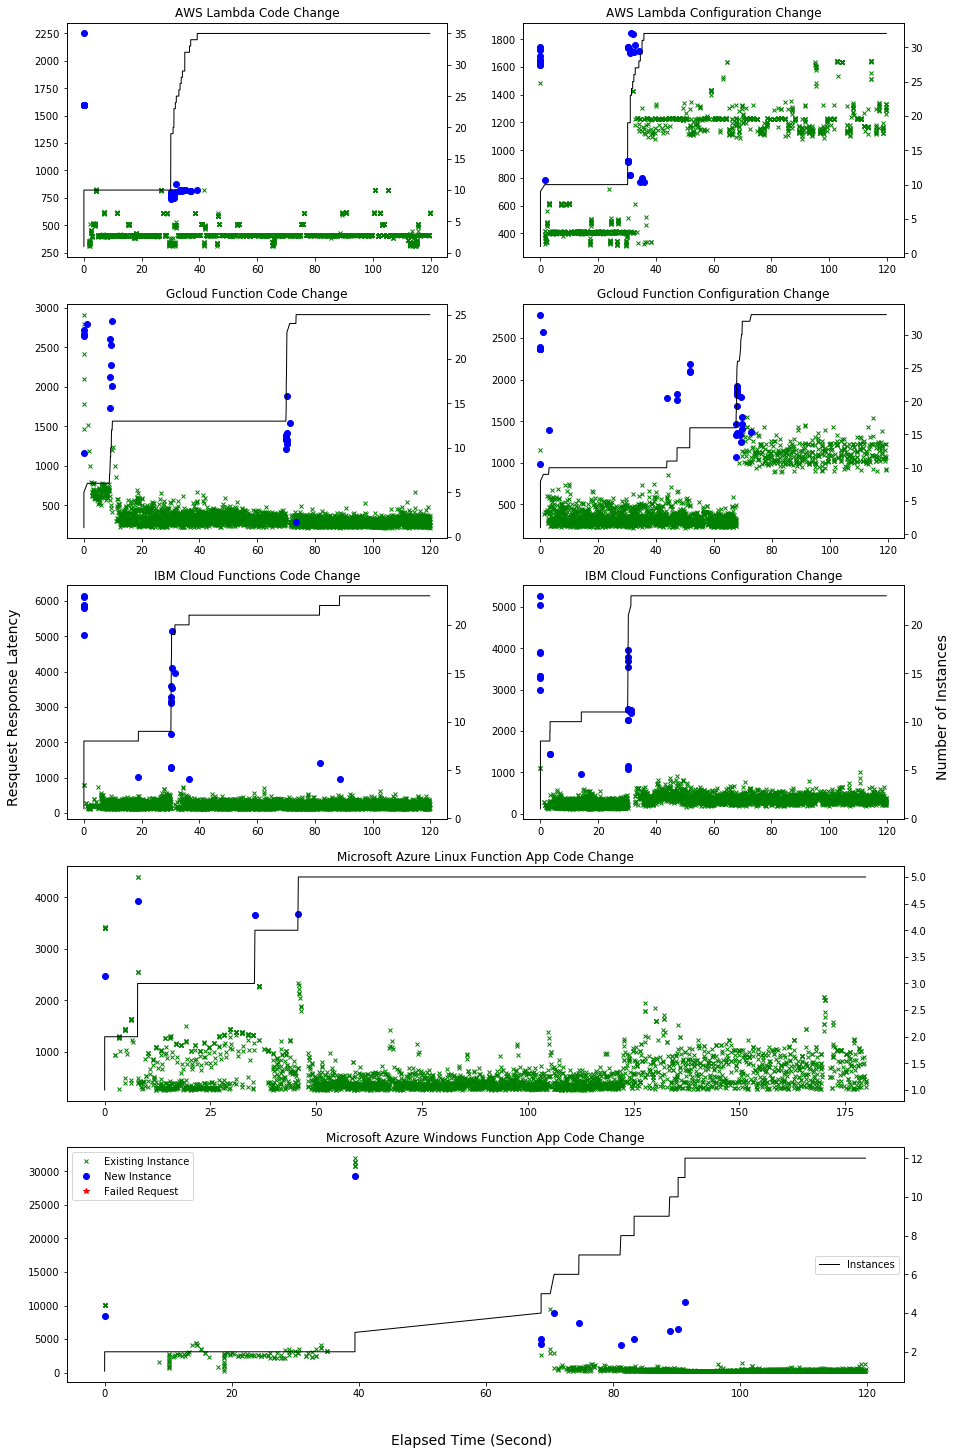

In [27]:
csvHeader=['timestamp', 'latency', 'protocol', 'code', 'status', 'thread', 'response' , 'version','value','latency2','statusCode','vm_id','boot_time']

awsCode = pd.read_csv('AWS/Results/aws-results-code.csv', names=csvHeader)
awsConfig = pd.read_csv('AWS/Results/aws-results-config.csv', names=csvHeader)

gcloudCode = pd.read_csv('Google/Results/gcloud-results-code.csv', names=csvHeader)
gcloudConfig = pd.read_csv('Google/Results/gcloud-results-config.csv', names=csvHeader)

ibmCode = pd.read_csv('IBM/Results/ibm-results-code.csv', names=csvHeader)
ibmConfig = pd.read_csv('IBM/Results/ibm-results-config.csv', names=csvHeader)

azureCodeLinux = pd.read_csv('Azure/Results/azure-linux-results-code.csv', names=csvHeader)
azureCodeWindows = pd.read_csv('Azure/Results/azure-windows-results-code.csv', names=csvHeader) 


awsCode = prepare_data(awsCode)
awsConfig = prepare_data(awsConfig)
gcloudCode = prepare_data(gcloudCode)
gcloudConfig = prepare_data(gcloudConfig)
ibmCode = prepare_data(ibmCode)
ibmConfig = prepare_data(ibmConfig)
azureCodeLinux = prepare_data(azureCodeLinux)
azureCodeWindows = prepare_data(azureCodeWindows)

codeFig , codef = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(15, 25))

codeFig.text(0.5, 0.09, 'Elapsed Time (Second)', ha='center', fontsize=14)
codeFig.text(0.07, 0.5, 'Resquest Response Latency', va='center', rotation='vertical', fontsize=14)
codeFig.text(0.93, 0.5, 'Number of Instances', va='center', rotation='vertical',fontsize=14)

#Plot AWS Code Change
plot = plt.subplot(5,2,1)
plot_data(awsCode,"AWS Lambda Code Change",plot)
#Plot AWS Config Change
plot = plt.subplot(5,2,2)
plot_data(awsConfig,"AWS Lambda Configuration Change",plot)

#Plot Gcloud Code Change
plot = plt.subplot(5,2,3)
plot_data(gcloudCode,"Gcloud Function Code Change",plot)

#Plot Gcloud Config Change
plot = plt.subplot(5,2,4)
plot_data(gcloudConfig,"Gcloud Function Configuration Change",plot)

# #Plot IBM Code Change
# plot = plt.subplot(5,2,5)
# plot_data(ibmCodeNode6,"IBM Cloud Functions Code Change",plot)

# #Plot IBM Config Change
# plot = plt.subplot(5,2,6)
# plot_data(ibmConfigNode6,"IBM Cloud Functions Configuration Change",plot)

#Plot IBM Node8 Code Change
plot = plt.subplot(5,2,5)
plot_data(ibmCode,"IBM Cloud Functions Code Change",plot)

#Plot IBM  Node8  Config Change
plot = plt.subplot(5,2,6)
plot_data(ibmConfig,"IBM Cloud Functions Configuration Change",plot)
#Plot Azure 

plot = plt.subplot(5,1,4)
plot_data(azureCodeLinux,"Microsoft Azure Linux Function App Code Change",plot)

plot = plt.subplot(5,1,5)
plot_data(azureCodeWindows,"Microsoft Azure Windows Function App Code Change",plot)
plt.rcParams.update({'font.size': 12})
plt.show()

codeFig.savefig('../report/Paper/resources/images/performance.png')

AWS Lambda time to propagate is 0.047
Gcloud Function time to propagate is 40.053
IBM Cloud time to propagate is 0.173
Microsoft Azure Linux time to propagate is 5.514
Microsoft Azure Windows time to propagate is 5.695


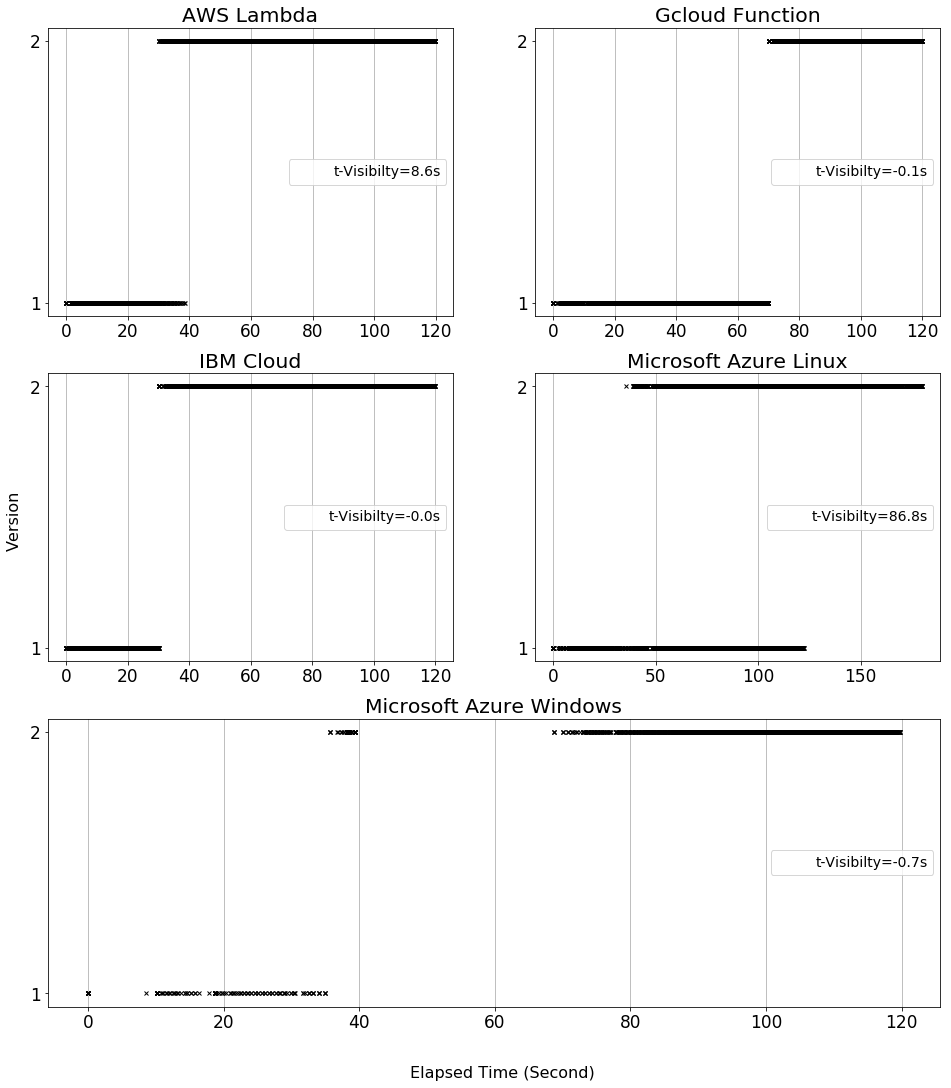

In [29]:
versionFig , b = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(16, 18))

versionFig.text(0.52, 0.07, 'Elapsed Time (Second)', ha='center', fontsize=16)
versionFig.text(0.09, 0.5, 'Version', va='center', rotation='vertical', fontsize=16)

plot_staleness(awsCode,"AWS Lambda",plt.subplot(3,2,1))
plot_staleness(gcloudCode,"Gcloud Function",plt.subplot(3,2,2))
plot_staleness(ibmCode,"IBM Cloud",plt.subplot(3,2,3))
plot_staleness(azureCodeLinux,"Microsoft Azure Linux",plt.subplot(3,2,4))
plot_staleness(azureCodeWindows,"Microsoft Azure Windows",plt.subplot(3,1,3))
plt.rcParams.update({'font.size': 17})
plt.show()

versionFig.savefig('../report/Paper/resources/images/tvisibility.png')
